In [81]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
 
from sklearn.ensemble import RandomForestRegressor

In [82]:
df = pd.read_csv("../data/clean_data.csv")
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,...,performance,high-performance,crossover,hybrid,luxury,flex_fuel,factory_tuner,hatchback,diesel,exotic
0,other,other,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,1,1,0,0,1,0,1,0,0,0
1,other,other,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,1,0,0,0,1,0,0,0,0,0
2,other,other,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,1,1,0,0,1,0,0,0,0,0
3,other,other,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,1,0,0,0,1,0,0,0,0,0
4,other,other,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0,0,0,0,1,0,0,0,0,0


In [83]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'vehicle_size', 'vehicle_style', 'highway_mpg',
       'city_mpg', 'popularity', 'msrp', 'performance', 'high-performance',
       'crossover', 'hybrid', 'luxury', 'flex_fuel', 'factory_tuner',
       'hatchback', 'diesel', 'exotic'],
      dtype='object')

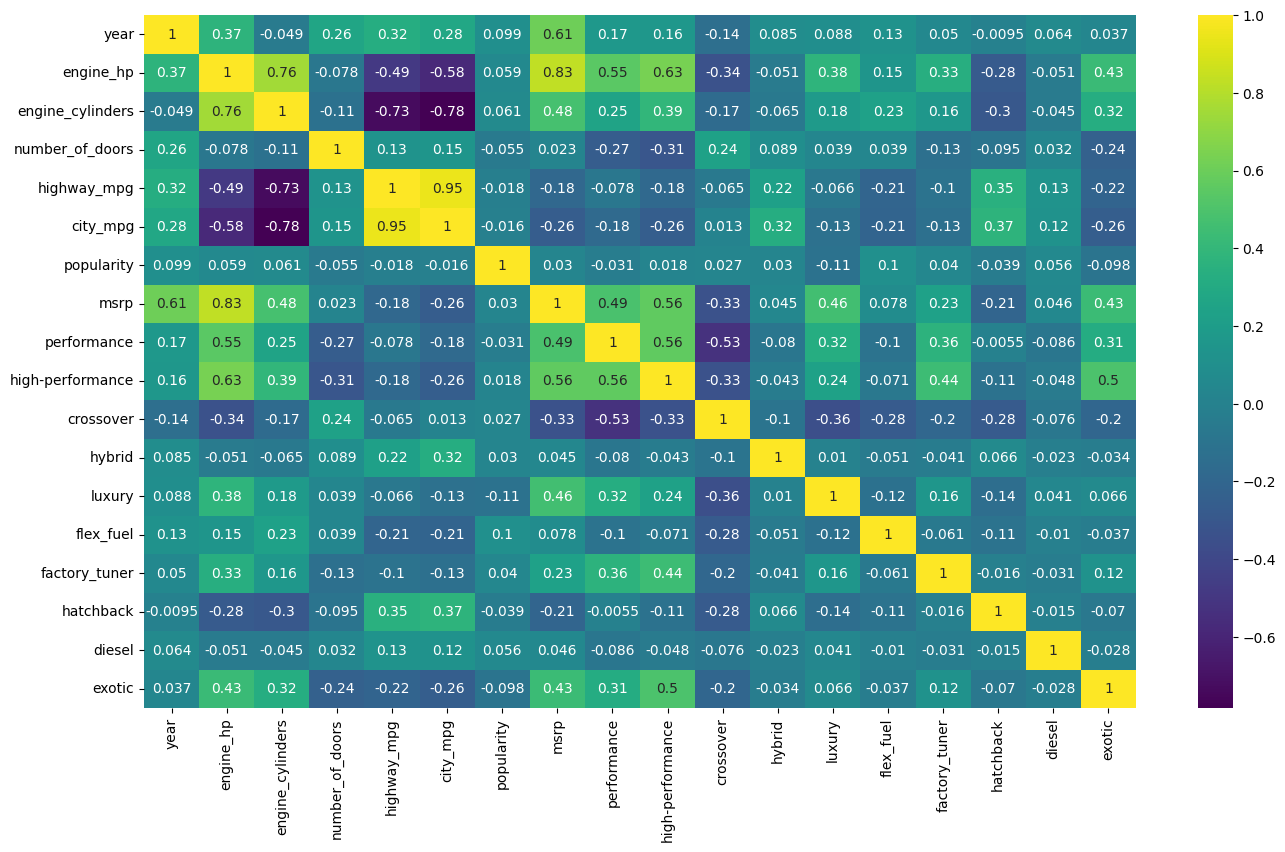

In [84]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="viridis")
plt.show()

# split data

In [85]:
x = df.drop(columns="msrp")
y = df["msrp"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=42)


# encoding

In [86]:
cat_col = df.select_dtypes("object").columns.tolist()
oe  = OrdinalEncoder()
oe.fit(x_train[cat_col])
x_train[cat_col] = oe.transform(x_train[cat_col])
x_test[cat_col] = oe.transform(x_test[cat_col])


# scaling

In [87]:
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

# modeling

In [90]:
models = {
    "linear":LinearRegression(),
    "ridge" : Ridge(random_state=42),
    "lasso":Lasso(random_state=42),
    "elasticnet":ElasticNet(random_state=42),
    "knn":KNeighborsRegressor(),
    "svr":SVR(),
    "tree":DecisionTreeRegressor(random_state=42),
    "forest" :RandomForestRegressor(random_state=42)
}

In [91]:
for name,c_model in models.items():
    model = c_model
    model.fit(x_train,y_train)
    print(F"model : {name}")
    print(f"Traing score :{model.score(x_train,y_train)}")
    print(f"Testing score :{model.score(x_test,y_test)}")
    print("....................")

model : linear
Traing score :0.8683853861238333
Testing score :0.86433968215105
....................
model : ridge
Traing score :0.8683853733594109
Testing score :0.8643385923790936
....................
model : lasso
Traing score :0.8683851395633336
Testing score :0.8643465931366952
....................
model : elasticnet
Traing score :0.8347493658120123
Testing score :0.8271734833483337
....................
model : knn
Traing score :0.9646413637859851
Testing score :0.9448168447951166
....................
model : svr
Traing score :0.008902912575995514
Testing score :0.012223472193274132
....................
model : tree
Traing score :0.991700150994234
Testing score :0.9628375836470529
....................
model : forest
Traing score :0.9901622680395252
Testing score :0.9738997810796359
....................
